### Experiment-7 Bayesian Network

In [98]:
# Code by Bhavy Kharbanda
# Sap Id: 500082531

In [99]:
# Importing Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sns

In [100]:
# Loading the iris dataset.
dataset = pd.read_csv('Datasets\BayesianNet.csv',names=['message','label'])
print("\nBayesian Dataset Dataset:")
print(dataset)


Bayesian Dataset Dataset:
                                    message  label
NaN                          Text Documents  Label
1.0                    I love this sandwich    pos
2.0                This is an amazing place    pos
3.0      I feel very good about these beers    pos
4.0                    This is my best work    pos
5.0                    What an awesome view    pos
6.0           I do not like this restaurant    neg
7.0                I am tired of this stuff    neg
8.0                  I can't deal with this    neg
9.0                    He is my sworn enemy    neg
10.0                    My boss is horrible    neg
11.0               This is an awesome place    pos
12.0  I do not like the taste of this juice    neg
13.0                        I love to dance    pos
14.0      I am sick and tired of this place    neg
15.0                   What a great holiday    pos
16.0         That is a bad locality to stay    neg
17.0         We will have good fun tomorrow    pos
18.0

In [101]:
# info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 19 entries, nan to 18.0
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  19 non-null     object
 1   label    19 non-null     object
dtypes: object(2)
memory usage: 456.0+ bytes


In [102]:
# Shape of the dataset
dataset.shape

(19, 2)

In [103]:
dataset['labelnum']=dataset.label.map({'pos':1,'neg':0})
dataset=dataset.iloc[1:,:]
X=dataset.message 
y=dataset.labelnum

print(X) 
print(y)

1.0                      I love this sandwich
2.0                  This is an amazing place
3.0        I feel very good about these beers
4.0                      This is my best work
5.0                      What an awesome view
6.0             I do not like this restaurant
7.0                  I am tired of this stuff
8.0                    I can't deal with this
9.0                      He is my sworn enemy
10.0                      My boss is horrible
11.0                 This is an awesome place
12.0    I do not like the taste of this juice
13.0                          I love to dance
14.0        I am sick and tired of this place
15.0                     What a great holiday
16.0           That is a bad locality to stay
17.0           We will have good fun tomorrow
18.0         I went to my enemy's house today
Name: message, dtype: object
1.0     1.0
2.0     1.0
3.0     1.0
4.0     1.0
5.0     1.0
6.0     0.0
7.0     0.0
8.0     0.0
9.0     0.0
10.0    0.0
11.0    1.0
12.0    0.0

In [104]:
xtrain,xtest,ytrain, ytest=train_test_split(X,y)

print ('\n The total number of Training Data :',ytrain.shape) 
print ('\n The total number of Test Data :',ytest.shape)


 The total number of Training Data : (13,)

 The total number of Test Data : (5,)


In [105]:
count_vect = CountVectorizer()
xtrain_dtm = count_vect.fit_transform(xtrain) 
xtest_dtm=count_vect.transform(xtest)

In [106]:
print('\n The words or Tokens in the text documents \n') 
print(count_vect.get_feature_names())


 The words or Tokens in the text documents 

['am', 'amazing', 'an', 'and', 'awesome', 'bad', 'best', 'boss', 'do', 'enemy', 'fun', 'good', 'great', 'have', 'holiday', 'horrible', 'house', 'is', 'like', 'locality', 'love', 'my', 'not', 'of', 'place', 'restaurant', 'sandwich', 'sick', 'stay', 'stuff', 'that', 'this', 'tired', 'to', 'today', 'tomorrow', 'view', 'we', 'went', 'what', 'will', 'work']


c:\Users\bhavy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [107]:
df=pd.DataFrame(xtrain_dtm.toarray(),columns=count_vect.get_feature_names())


In [108]:
df

,am,amazing,an,and,awesome,bad,best,boss,do,enemy,...,tired,to,today,tomorrow,view,we,went,what,will,work
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,0
6,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [109]:
clf = MultinomialNB().fit(xtrain_dtm,ytrain) 
predicted = clf.predict(xtest_dtm)


In [110]:
print('\n Accuracy of the classifer is', metrics.accuracy_score(ytest,predicted))


 Accuracy of the classifer is 0.6


In [111]:
# Calculating the Confusion matrix
cnf_matrix = metrics.confusion_matrix(ytest, predicted)
print("\nConfusion Matrix for the Model:  ")
cnf_matrix


Confusion Matrix for the Model:  


array([[2, 1],
       [1, 1]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

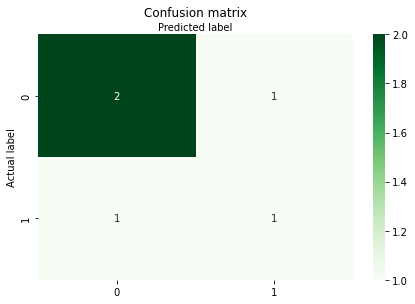

In [112]:
# Visualization of Confusion matrix
class_names=[0,1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# TN FP
# FN TP

In [113]:
print('\n The value of Precision' , metrics.precision_score(ytest,predicted))
print('\n The value of Recall' , metrics.recall_score(ytest,predicted))


 The value of Precision 0.5

 The value of Recall 0.5
